In [2]:
#### Agglomeration of communities ####

import pandas as pd 
import os 
from datetime import datetime 
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

import numpy as np

In [6]:
cwd = os.getcwd()
input_path = f"{cwd}/Data/frequencies/"
date = datetime.now().strftime("%Y%m%d")
cutoff = 25

groups = ['MOC2_CCR2KO', 'MOC2_WT']
WT = pd.read_csv(f"{input_path}freqs_{groups[1]}_{cutoff}px_{date}.csv")
KO = pd.read_csv(f"{input_path}freqs_{groups[0]}_{cutoff}px_{date}.csv")
WT['Group'] = 'WT'
KO['Group'] = 'CCR2KO'

MOC2 = pd.concat([WT,KO])
MOC2

,Unique_ROI_ID,source_ID,source_cluster,Dendritic cells,Endothelium Thy1+,Endothelium Thy1-,Fibroblasts,Macrophages CD68,Macrophages F480,Neutrophils,T cell CD4,T cell CD8,T cell regulatory,Tumour,Undefined,cDC1 Dendritic cells,Group
0,MOC2_WT_1B_2_17,1,Endothelium Thy1+,0.000000,0.250000,0.0,0.0,0.000000,0.0,0.25,0.0,0.0,0.0,0.500000,0.0,0.000000,WT
1,MOC2_WT_1B_2_17,2,Tumour,0.000000,0.250000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.750000,0.0,0.000000,WT
2,MOC2_WT_1B_2_17,3,Tumour,0.000000,0.166667,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.833333,0.0,0.000000,WT
3,MOC2_WT_1B_2_17,4,Tumour,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,1.000000,0.0,0.000000,WT
4,MOC2_WT_1B_2_17,5,Endothelium Thy1+,0.142857,0.000000,0.0,0.0,0.142857,0.0,0.00,0.0,0.0,0.0,0.428571,0.0,0.285714,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348806,MOC2_CCR2KO_NM_1_16,80728,Tumour,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,1.000000,0.0,0.000000,CCR2KO
348807,MOC2_CCR2KO_NM_1_16,80729,Tumour,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,1.000000,0.0,0.000000,CCR2KO
348808,MOC2_CCR2KO_NM_1_16,80730,Macrophages CD68,0.000000,0.000000,0.0,0.0,0.111111,0.0,0.00,0.0,0.0,0.0,0.888889,0.0,0.000000,CCR2KO
348809,MOC2_CCR2KO_NM_1_16,80731,Tumour,0.000000,0.000000,0.0,0.0,0.500000,0.0,0.00,0.0,0.0,0.0,0.500000,0.0,0.000000,CCR2KO


In [14]:
# match cell type names in colummns and rows

# Rows
replacement_map = {'Endothelium Thy1+':'Endothelium_thy1_high',
       'T cell CD4':'Tcell_CD4',
       'T cell CD8':'Tcell_CD8', 'Macrophages CD68':'Macrophage_CD68', 'Dendritic cells':'DCs',
       'cDC1 Dendritic cells':'cDC1_DCs', 'T cell regulatory':'Treg', 'Macrophages F480':'Macrophage_F480',
       'Endothelium Thy1-':'Endothelium_thy1_low'}
MOC2['source_cluster'] = MOC2['source_cluster'].replace(replacement_map)
MOC2['source_cluster'].unique()

# Columns
MOC2 = MOC2.rename(columns=replacement_map)
MOC2.columns

df = MOC2.iloc[:,3:-1]
MOC2.columns

Index(['Unique_ROI_ID', 'source_ID', 'source_cluster', 'DCs',
       'Endothelium_thy1_high', 'Endothelium_thy1_low', 'Fibroblasts',
       'Macrophage_CD68', 'Macrophage_F480', 'Neutrophils', 'Tcell_CD4',
       'Tcell_CD8', 'Treg', 'Tumour', 'Undefined', 'cDC1_DCs', 'Group'],
      dtype='object')

In [16]:
# PERFORM CLUSTERING BEFORE CONTINUING
# ---------------------------------------------


In [ ]:
# Load clusters

In [30]:
#### Agglomerative clustering function ####

def agglomerative_clustering(k, average_neighbours, avg_noCluster, agglomerate_to):
    
    # Agglomerative clustering to chosen number of communities as determined by own biological knowledge of the data
    ac1 = AgglomerativeClustering(linkage = 'average', n_clusters = agglomerate_to)
    agglomerate1 = pd.DataFrame(ac1.fit_predict(avg_noCluster))
    # Rename column
    agglomerate1.columns = [f"agglomerateto_{agglomerate_to}"]
    agglomerate1[f"agglomerateto_{agglomerate_to}"] += 1
    # Add agglomerated data to average neighbours 
    average_neighbours = average_neighbours.join(agglomerate1)
   
    print(list(average_neighbours))
    
    # Save data with added columns 
    average_neighbours.to_csv(f"{data_path}clustering/reclustered_{agglomerate_to}.csv", index = False)
    print('dataset saved')

    return pd.DataFrame(average_neighbours)

In [31]:
colors = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#42d4f4', '#f032e6', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#000075', '#a9a9a9', '#000000']
cts = ['DCs', 'Endothelium_thy1_high', 'Endothelium_thy1_low', 'Fibroblasts',
       'Macrophage_CD68', 'Macrophage_F480', 'Neutrophils', 'Tcell_CD8',
       'Treg', 'Tumour', 'Undefined', 'cDC1_DCs']
# colors = ['blue', 'orange', 'green', 'red', 'purple', 'maroon', 'pink', 'gray', 'yellow', 'cyan', 'magenta', 'olive', 'brown', 'navy', 'aqua', 'teal']


In [32]:
# Create average_neighbours
centroid_noclus = df.groupby('cluster').mean()
centroids = centroid_noclus.reset_index()
# centroid_noclus = cluster_centroids.drop('cluster')
print(centroid_noclus.shape)
centroid_noclus
# centroids

(170, 12)


,DCs,Endothelium_thy1_high,Endothelium_thy1_low,Fibroblasts,Macrophage_CD68,Macrophage_F480,Neutrophils,Tcell_CD8,Treg,Tumour,Undefined,cDC1_DCs
cluster,,,,,,,,,,,,
1,0.001253,0.242656,0.001733,0.004505,0.004384,0.000475,0.396491,0.000847,0.000854,0.345007,0.000877,0.000918
2,0.000654,0.350982,0.001319,0.001483,0.000066,0.000120,0.001312,0.001705,0.001471,0.637025,0.002188,0.001677
3,0.001017,0.195499,0.000464,0.000463,0.000000,0.000070,0.000273,0.001534,0.000978,0.798074,0.000095,0.001533
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5,0.011593,0.012034,0.000917,0.002275,0.003713,0.000256,0.002607,0.007864,0.004618,0.814787,0.000448,0.138886
...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.004793,0.044119,0.014780,0.004917,0.042231,0.005697,0.009484,0.002727,0.027881,0.408879,0.432384,0.002109
167,0.000000,0.000000,0.000000,0.000000,0.120005,0.000000,0.000000,0.000000,0.000000,0.879995,0.000000,0.000000
168,0.000000,0.000000,0.000719,0.000000,0.318498,0.000000,0.000000,0.000060,0.000000,0.680723,0.000000,0.000000


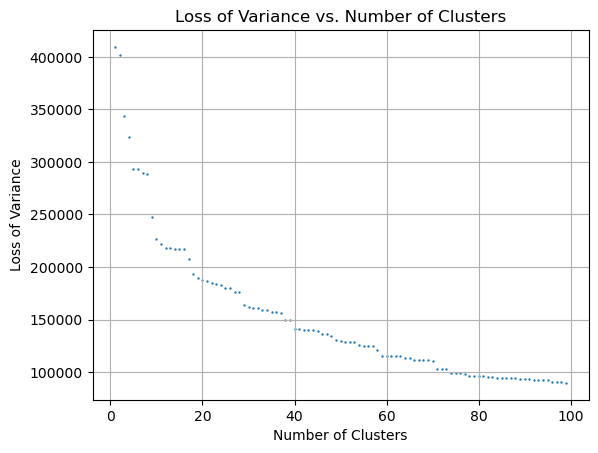

In [33]:

from sklearn.metrics import pairwise_distances

# Function to calculate the loss of variance
def calculate_loss_of_variance(clusters, data):
    loss = 0
    for cluster_id in np.unique(clusters):
        cluster_data = data.loc[clusters == cluster_id, data.columns != 'Cluster']
        centroid = cluster_data.mean(axis=0)
        cluster_loss = np.sum(pairwise_distances(cluster_data, [centroid])**2)
        loss += cluster_loss
    return loss

# Perform agglomerative clustering
n_clusters_range = range(1, 100)  # Define a range of cluster numbers to try
losses = []
num_clusters_left = []

for n_clusters in n_clusters_range:
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = clustering.fit_predict(centroids.iloc[:,1:])
    loss = calculate_loss_of_variance(clusters, centroids)
    losses.append(loss)
    num_clusters_left.append(n_clusters)

    # print(f"After merging to {n_clusters} clusters, loss of variance: {loss}")

# Plotting loss of variance after every merge
plt.scatter(num_clusters_left, losses, marker='o', s=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Loss of Variance')
plt.title('Loss of Variance vs. Number of Clusters')
plt.grid(True)
plt.savefig(f'{data_path}plots/Loss_var__clusno.png', bbox_inches='tight', dpi=300)

plt.show()
# Significant drops in variance occur at merging to 59, 40, 29


In [34]:
# Agglomerate to 29 communities 
average_neighbours29= agglomerative_clustering(range(2,centroids.cluster.max()), centroids, centroid_noclus, 29)
# # Agglomerate to 40 communities 
average_neighbours40 = agglomerative_clustering(range(2,centroids.cluster.max()), centroids, centroid_noclus, 40)
# Agglomerate to 59 communities 
average_neighbours59 = agglomerative_clustering(range(2,centroids.cluster.max()), centroids, centroid_noclus, 59)

average_neighbours59

['cluster', 'DCs', 'Endothelium_thy1_high', 'Endothelium_thy1_low', 'Fibroblasts', 'Macrophage_CD68', 'Macrophage_F480', 'Neutrophils', 'Tcell_CD8', 'Treg', 'Tumour', 'Undefined', 'cDC1_DCs', 'agglomerateto_29']
dataset saved
['cluster', 'DCs', 'Endothelium_thy1_high', 'Endothelium_thy1_low', 'Fibroblasts', 'Macrophage_CD68', 'Macrophage_F480', 'Neutrophils', 'Tcell_CD8', 'Treg', 'Tumour', 'Undefined', 'cDC1_DCs', 'agglomerateto_40']
dataset saved
['cluster', 'DCs', 'Endothelium_thy1_high', 'Endothelium_thy1_low', 'Fibroblasts', 'Macrophage_CD68', 'Macrophage_F480', 'Neutrophils', 'Tcell_CD8', 'Treg', 'Tumour', 'Undefined', 'cDC1_DCs', 'agglomerateto_59']
dataset saved


,cluster,DCs,Endothelium_thy1_high,Endothelium_thy1_low,Fibroblasts,Macrophage_CD68,Macrophage_F480,Neutrophils,Tcell_CD8,Treg,Tumour,Undefined,cDC1_DCs,agglomerateto_59
0,1,0.001253,0.242656,0.001733,0.004505,0.004384,0.000475,0.396491,0.000847,0.000854,0.345007,0.000877,0.000918,36
1,2,0.000654,0.350982,0.001319,0.001483,0.000066,0.000120,0.001312,0.001705,0.001471,0.637025,0.002188,0.001677,32
2,3,0.001017,0.195499,0.000464,0.000463,0.000000,0.000070,0.000273,0.001534,0.000978,0.798074,0.000095,0.001533,56
3,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,51
4,5,0.011593,0.012034,0.000917,0.002275,0.003713,0.000256,0.002607,0.007864,0.004618,0.814787,0.000448,0.138886,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,166,0.004793,0.044119,0.014780,0.004917,0.042231,0.005697,0.009484,0.002727,0.027881,0.408879,0.432384,0.002109,17
166,167,0.000000,0.000000,0.000000,0.000000,0.120005,0.000000,0.000000,0.000000,0.000000,0.879995,0.000000,0.000000,7
167,168,0.000000,0.000000,0.000719,0.000000,0.318498,0.000000,0.000000,0.000060,0.000000,0.680723,0.000000,0.000000,24
168,169,0.000000,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.000000,0.000000,0.925926,0.000000,0.000000,2


In [35]:
data_wt

,Unique_ROI_ID,source_ID,source_cluster,DCs,Endothelium_thy1_high,Endothelium_thy1_low,Fibroblasts,Macrophage_CD68,Macrophage_F480,Neutrophils,Tcell_CD8,Treg,Tumour,Undefined,cDC1_DCs,cluster
1,MOC2_WT_1B_2_17,1,Endothelium_thy1_high,0.000000,0.250000,0.0,0.0,0.000000,0.0,0.25,0.0,0.0,0.500000,0.000000,0.000000,1
2,MOC2_WT_1B_2_17,2,Tumour,0.000000,0.250000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.750000,0.000000,0.000000,2
3,MOC2_WT_1B_2_17,3,Tumour,0.000000,0.166667,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.833333,0.000000,0.000000,3
4,MOC2_WT_1B_2_17,4,Tumour,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,1.000000,0.000000,0.000000,4
5,MOC2_WT_1B_2_17,5,Endothelium_thy1_high,0.142857,0.000000,0.0,0.0,0.142857,0.0,0.00,0.0,0.0,0.428571,0.000000,0.285714,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355534,MOC2_WT_NM_1_20,90520,Endothelium_thy1_low,0.000000,0.000000,0.0,0.0,0.000000,0.1,0.00,0.0,0.3,0.000000,0.600000,0.000000,166
355535,MOC2_WT_NM_1_20,90521,Undefined,0.000000,0.071429,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.214286,0.714286,0.000000,166
355536,MOC2_WT_NM_1_20,90522,Tumour,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.00,0.0,0.0,0.000000,0.000000,0.000000,149
355537,MOC2_WT_NM_1_20,90523,Undefined,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.000000,1.000000,0.000000,166


In [36]:
# Annotate entire dataset with clusters after specific clustering k
# Set df
df_cl = average_neighbours59
num_clus = df_cl.iloc[:,-1].max()
key = df_cl[['cluster', f'agglomerateto_{num_clus}']]
merged_df = pd.merge(data_wt, key, on='cluster', how='inner').drop(columns=['cluster', 'source_ID', 'Unique_ROI_ID'])
merged_df.rename(columns={f'agglomerateto_{num_clus}': f'cluster{num_clus}'}, inplace=True)
merged_df

,source_cluster,DCs,Endothelium_thy1_high,Endothelium_thy1_low,Fibroblasts,Macrophage_CD68,Macrophage_F480,Neutrophils,Tcell_CD8,Treg,Tumour,Undefined,cDC1_DCs,cluster59
0,Endothelium_thy1_high,0.0,0.250000,0.0,0.0,0.000000,0.0,0.250000,0.0,0.0,0.500000,0.0,0.0,36
1,Neutrophils,0.0,0.285714,0.0,0.0,0.000000,0.0,0.142857,0.0,0.0,0.571429,0.0,0.0,36
2,Endothelium_thy1_high,0.0,0.111111,0.0,0.0,0.000000,0.0,0.222222,0.0,0.0,0.666667,0.0,0.0,36
3,Tumour,0.0,0.166667,0.0,0.0,0.000000,0.0,0.166667,0.0,0.0,0.666667,0.0,0.0,36
4,Tumour,0.0,0.200000,0.0,0.1,0.000000,0.0,0.100000,0.0,0.0,0.600000,0.0,0.0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355533,Macrophage_CD68,0.0,0.000000,0.0,0.0,0.038462,0.0,0.000000,0.0,0.0,0.961538,0.0,0.0,2
355534,Tumour,0.0,0.000000,0.0,0.0,0.038462,0.0,0.000000,0.0,0.0,0.961538,0.0,0.0,2
355535,Tumour,0.0,0.000000,0.0,0.0,0.038462,0.0,0.000000,0.0,0.0,0.961538,0.0,0.0,2
355536,Endothelium_thy1_high,0.0,0.000000,0.0,0.0,0.038462,0.0,0.000000,0.0,0.0,0.961538,0.0,0.0,2


<Figure size 2000x1000 with 0 Axes>

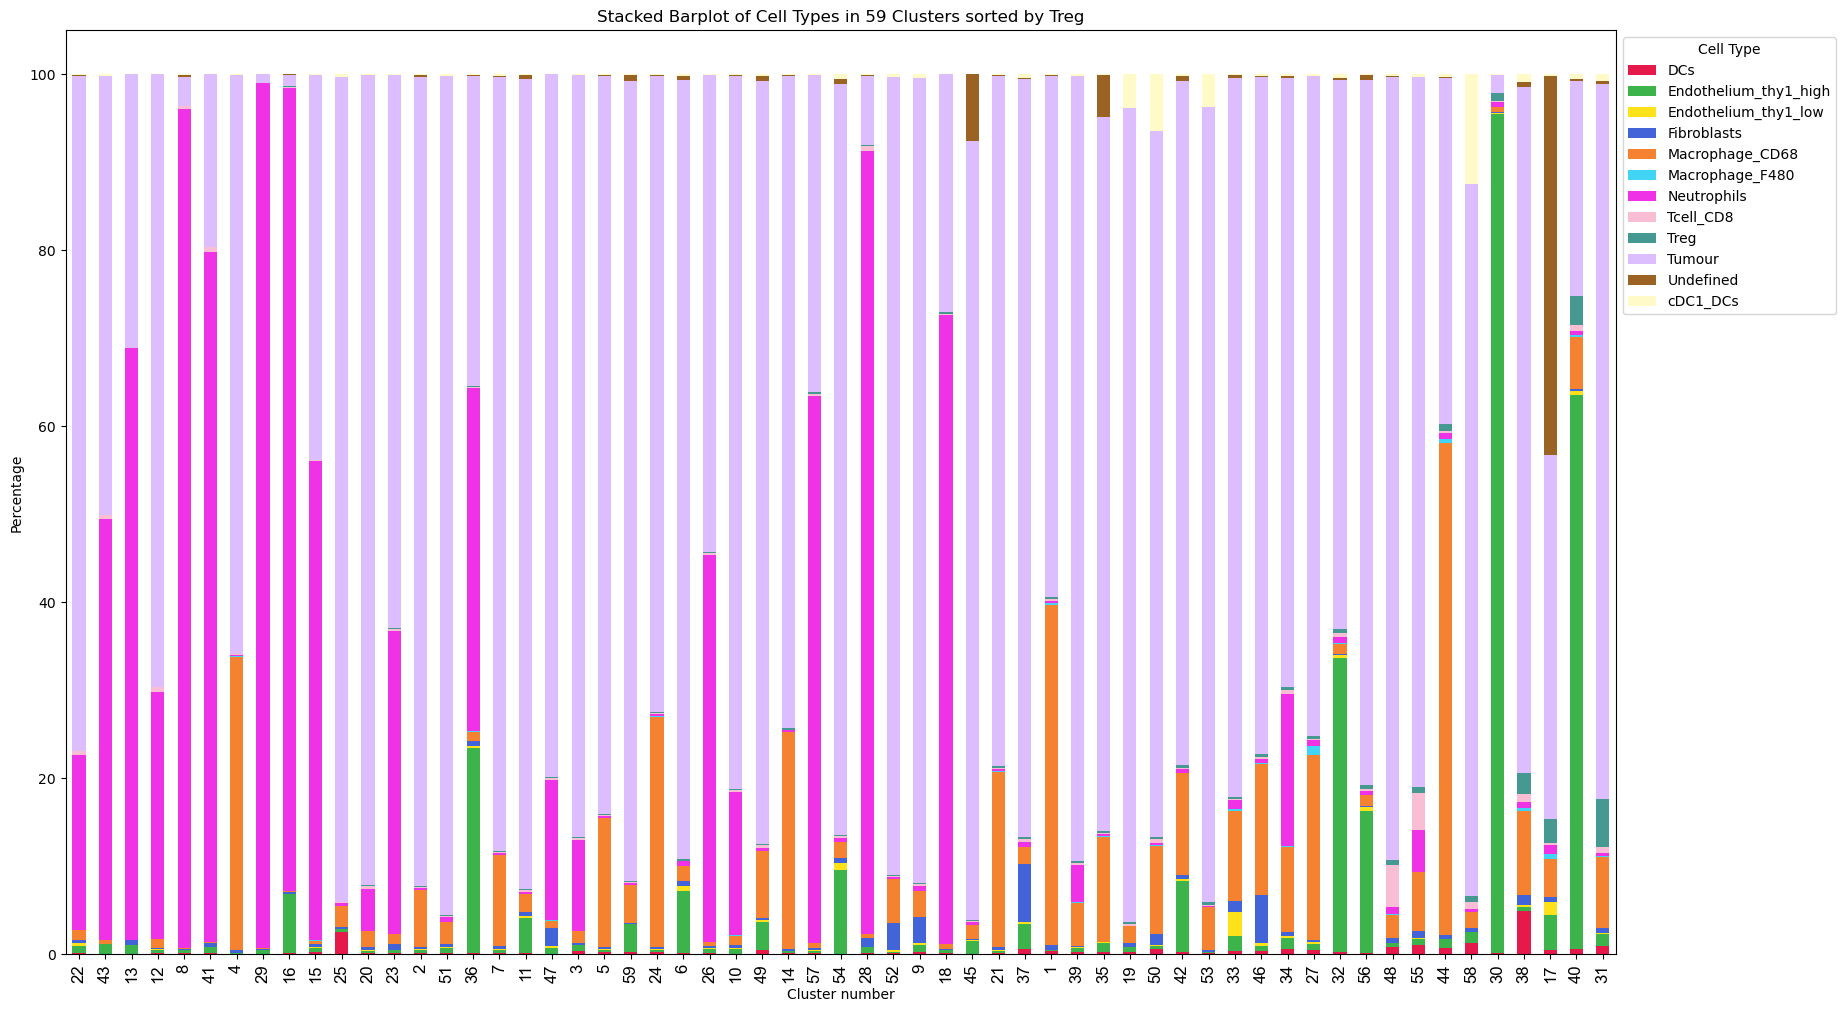

In [38]:
sort_celltype = 'Treg'

# Grouping by 'cluster' and 'celltype' and getting counts
result = merged_df.groupby([f'cluster{num_clus}', 'source_cluster']).size().reset_index(name='Count')

# Pivot the table to get totals per cluster and cell type
result = result.pivot_table(index='source_cluster', columns=f'cluster{num_clus}', values='Count', fill_value=0)
# Sort by dendrogram
# result = result[clus_order]

# Add totals for each cell type and each cluster
result['Total_Cell_Type'] = result.sum(axis=1)
result.loc['Total_Cells'] = result.sum()

result_percentage = result.iloc[:,:-1].div(result.loc['Total_Cells'], axis=1) * 100

# Sort the columns based on the values in the selected row
sorted_columns = result_percentage.columns[result_percentage.loc[sort_celltype].argsort()]

# Reorder the DataFrame based on the sorted columns
result_percentage = result_percentage[sorted_columns]


# Plotting
plt.figure(figsize=(20, 10))

ax = result_percentage.iloc[:-1,:-1].T.plot(kind='bar', stacked=True, figsize=(20, 12),width=0.5, color=colors)
ax.set_ylabel('Percentage')
ax.set_xlabel('Cluster number')
ax.set_title(f'Stacked Barplot of Cell Types in {num_clus} Clusters sorted by {sort_celltype}')
# plt.xticks(fontsize=3)
plt.xticks(fontsize=12, fontfamily='Arial', fontweight='normal')

# # Annotate total amount of cells above each bar
# for i, total in enumerate(result.loc['Total_Cells'][:-1]):  # Exclude the 'Total_Cells' row
#     ax.annotate(f'{total}', (i, 100), xytext=(0, 5), textcoords='offset points', ha='center', rotation=90, fontsize=3)

# Show plot
plt.legend(title='Cell Type', bbox_to_anchor=(1, 1))

plt.savefig(f'{data_path}plots/stacked_barplot_clusno_{num_clus}_sorted_{sort_celltype}.png', bbox_inches='tight', dpi=300)

plt.show()

In [48]:
# Annotate entire dataset with clusters after specific clustering k
# Set df
df_cl = average_neighbours40
num_clus = df_cl.iloc[:,-1].max()
key = df_cl[['cluster', f'agglomerateto_{num_clus}']]
merged_df = pd.merge(data_wt, key, on='cluster', how='inner').drop(columns=['cluster', 'source_ID', 'Unique_ROI_ID'])
merged_df.rename(columns={f'agglomerateto_{num_clus}': f'cluster{num_clus}'}, inplace=True)
merged_df

,source_cluster,DCs,Endothelium_thy1_high,Endothelium_thy1_low,Fibroblasts,Macrophage_CD68,Macrophage_F480,Neutrophils,Tcell_CD8,Treg,Tumour,Undefined,cDC1_DCs,cluster40
0,Endothelium_thy1_high,0.0,0.250000,0.0,0.0,0.000000,0.0,0.250000,0.0,0.0,0.500000,0.0,0.0,36
1,Neutrophils,0.0,0.285714,0.0,0.0,0.000000,0.0,0.142857,0.0,0.0,0.571429,0.0,0.0,36
2,Endothelium_thy1_high,0.0,0.111111,0.0,0.0,0.000000,0.0,0.222222,0.0,0.0,0.666667,0.0,0.0,36
3,Tumour,0.0,0.166667,0.0,0.0,0.000000,0.0,0.166667,0.0,0.0,0.666667,0.0,0.0,36
4,Tumour,0.0,0.200000,0.0,0.1,0.000000,0.0,0.100000,0.0,0.0,0.600000,0.0,0.0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355533,Macrophage_CD68,0.0,0.000000,0.0,0.0,0.038462,0.0,0.000000,0.0,0.0,0.961538,0.0,0.0,4
355534,Tumour,0.0,0.000000,0.0,0.0,0.038462,0.0,0.000000,0.0,0.0,0.961538,0.0,0.0,4
355535,Tumour,0.0,0.000000,0.0,0.0,0.038462,0.0,0.000000,0.0,0.0,0.961538,0.0,0.0,4
355536,Endothelium_thy1_high,0.0,0.000000,0.0,0.0,0.038462,0.0,0.000000,0.0,0.0,0.961538,0.0,0.0,4


<Figure size 2000x1000 with 0 Axes>

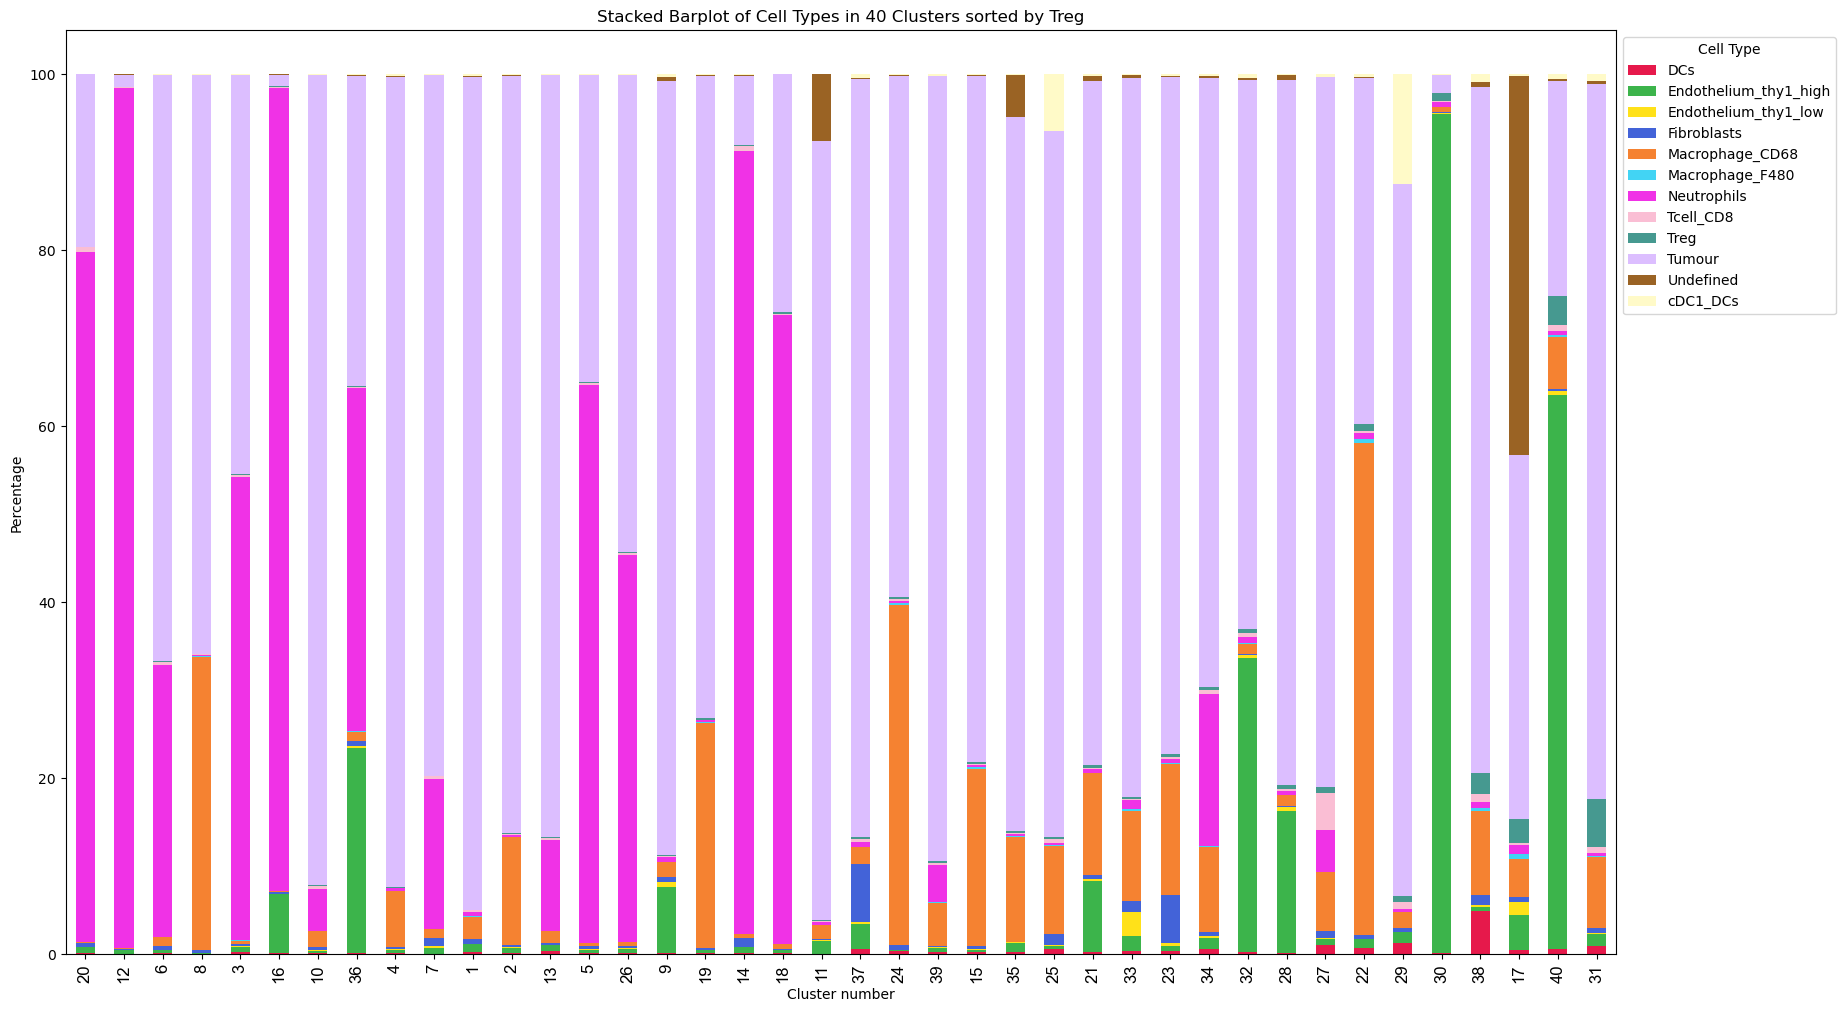

In [49]:
sort_celltype = 'Treg'

# Grouping by 'cluster' and 'celltype' and getting counts
result = merged_df.groupby([f'cluster{num_clus}', 'source_cluster']).size().reset_index(name='Count')

# Pivot the table to get totals per cluster and cell type
result = result.pivot_table(index='source_cluster', columns=f'cluster{num_clus}', values='Count', fill_value=0)
# Sort by dendrogram
# result = result[clus_order]

# Add totals for each cell type and each cluster
result['Total_Cell_Type'] = result.sum(axis=1)
result.loc['Total_Cells'] = result.sum()

result_percentage = result.iloc[:,:-1].div(result.loc['Total_Cells'], axis=1) * 100

# Sort the columns based on the values in the selected row
sorted_columns = result_percentage.columns[result_percentage.loc[sort_celltype].argsort()]

# Reorder the DataFrame based on the sorted columns
result_percentage = result_percentage[sorted_columns]


# Plotting
plt.figure(figsize=(20, 10))

ax = result_percentage.iloc[:-1,:-1].T.plot(kind='bar', stacked=True, figsize=(20, 12),width=0.5, color=colors)
ax.set_ylabel('Percentage')
ax.set_xlabel('Cluster number')
ax.set_title(f'Stacked Barplot of Cell Types in {num_clus} Clusters sorted by {sort_celltype}')
# plt.xticks(fontsize=3)
plt.xticks(fontsize=12, fontfamily='Arial', fontweight='normal')

# # Annotate total amount of cells above each bar
# for i, total in enumerate(result.loc['Total_Cells'][:-1]):  # Exclude the 'Total_Cells' row
#     ax.annotate(f'{total}', (i, 100), xytext=(0, 5), textcoords='offset points', ha='center', rotation=90, fontsize=3)

# Show plot
plt.legend(title='Cell Type', bbox_to_anchor=(1, 1))

plt.savefig(f'{data_path}plots/stacked_barplot_clusno_{num_clus}_sorted_{sort_celltype}.png', bbox_inches='tight', dpi=300)

plt.show()

In [41]:
# Annotate entire dataset with clusters after specific clustering k
# Set df
df_cl = average_neighbours29
num_clus = df_cl.iloc[:,-1].max()
key = df_cl[['cluster', f'agglomerateto_{num_clus}']]
merged_df = pd.merge(data_wt, key, on='cluster', how='inner').drop(columns=['cluster', 'source_ID', 'Unique_ROI_ID'])
merged_df.rename(columns={f'agglomerateto_{num_clus}': f'cluster{num_clus}'}, inplace=True)
merged_df

,source_cluster,DCs,Endothelium_thy1_high,Endothelium_thy1_low,Fibroblasts,Macrophage_CD68,Macrophage_F480,Neutrophils,Tcell_CD8,Treg,Tumour,Undefined,cDC1_DCs,cluster29
0,Endothelium_thy1_high,0.0,0.250000,0.0,0.0,0.000000,0.0,0.250000,0.0,0.0,0.500000,0.0,0.0,18
1,Neutrophils,0.0,0.285714,0.0,0.0,0.000000,0.0,0.142857,0.0,0.0,0.571429,0.0,0.0,18
2,Endothelium_thy1_high,0.0,0.111111,0.0,0.0,0.000000,0.0,0.222222,0.0,0.0,0.666667,0.0,0.0,18
3,Tumour,0.0,0.166667,0.0,0.0,0.000000,0.0,0.166667,0.0,0.0,0.666667,0.0,0.0,18
4,Tumour,0.0,0.200000,0.0,0.1,0.000000,0.0,0.100000,0.0,0.0,0.600000,0.0,0.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355533,Macrophage_CD68,0.0,0.000000,0.0,0.0,0.038462,0.0,0.000000,0.0,0.0,0.961538,0.0,0.0,1
355534,Tumour,0.0,0.000000,0.0,0.0,0.038462,0.0,0.000000,0.0,0.0,0.961538,0.0,0.0,1
355535,Tumour,0.0,0.000000,0.0,0.0,0.038462,0.0,0.000000,0.0,0.0,0.961538,0.0,0.0,1
355536,Endothelium_thy1_high,0.0,0.000000,0.0,0.0,0.038462,0.0,0.000000,0.0,0.0,0.961538,0.0,0.0,1


<Figure size 2000x1000 with 0 Axes>

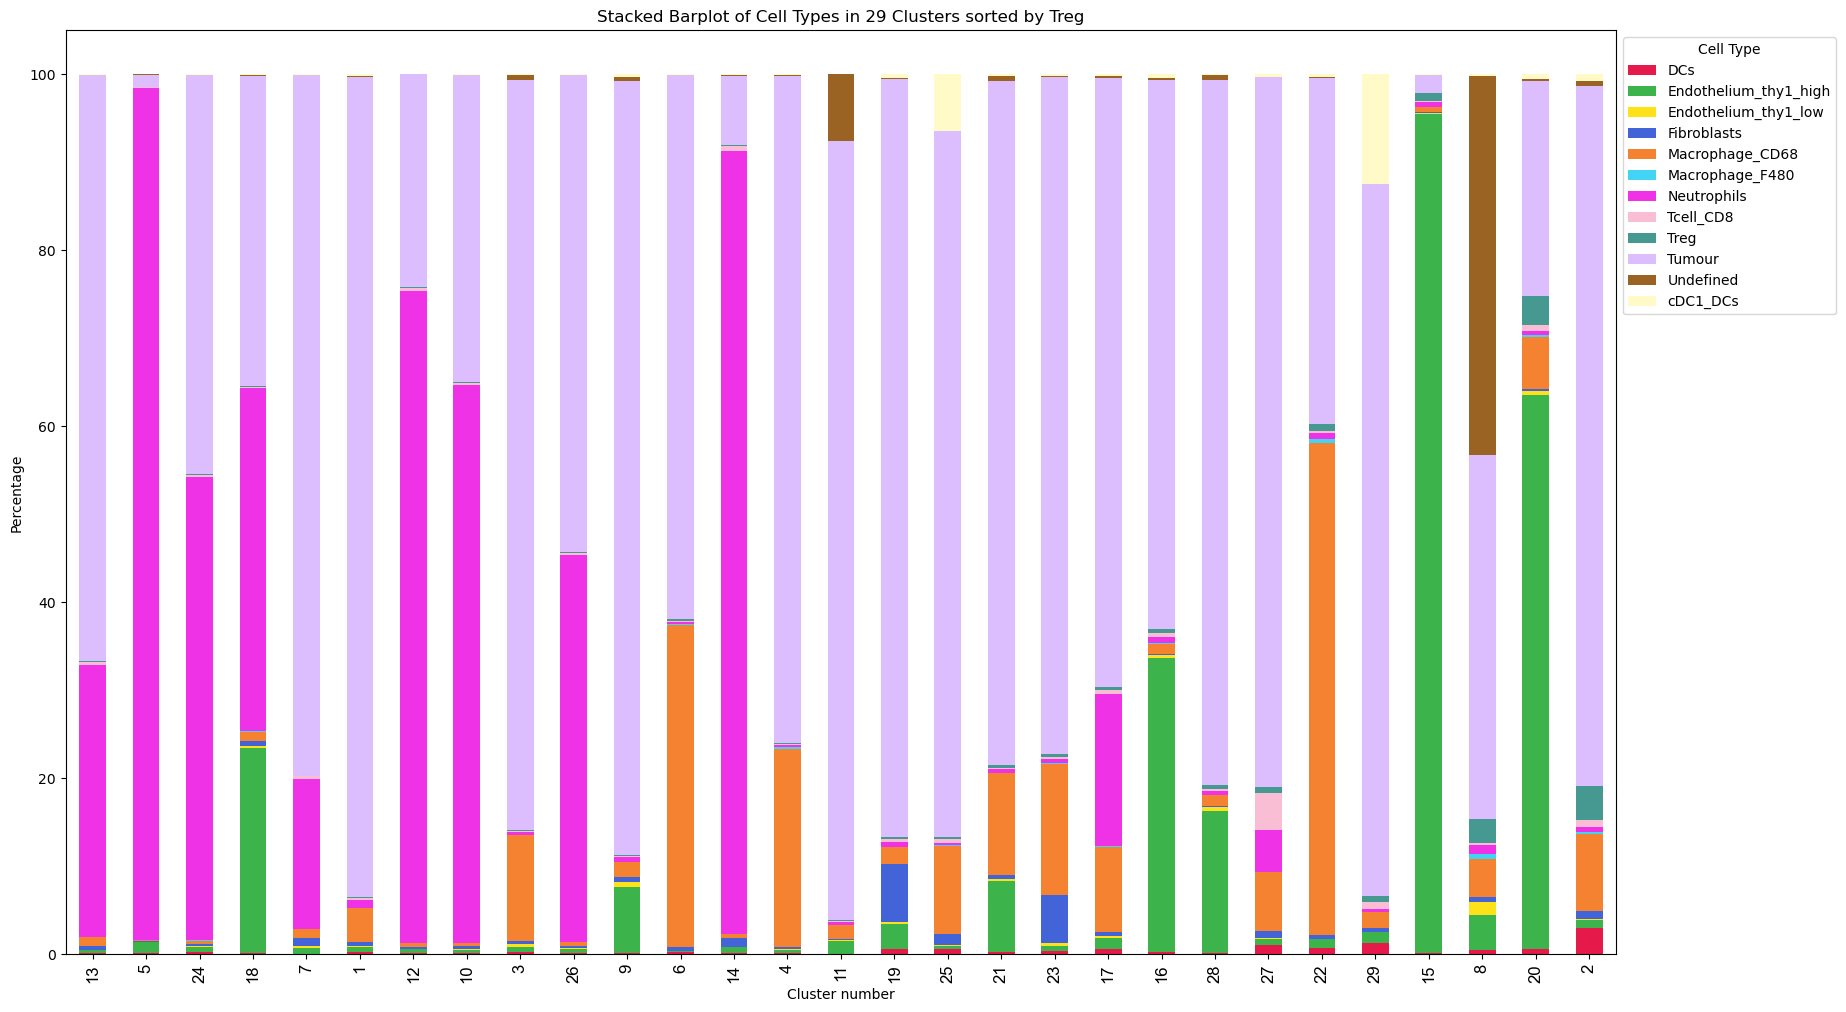

In [42]:
sort_celltype = 'Treg'

# Grouping by 'cluster' and 'celltype' and getting counts
result = merged_df.groupby([f'cluster{num_clus}', 'source_cluster']).size().reset_index(name='Count')

# Pivot the table to get totals per cluster and cell type
result = result.pivot_table(index='source_cluster', columns=f'cluster{num_clus}', values='Count', fill_value=0)
# Sort by dendrogram
# result = result[clus_order]

# Add totals for each cell type and each cluster
result['Total_Cell_Type'] = result.sum(axis=1)
result.loc['Total_Cells'] = result.sum()

result_percentage = result.iloc[:,:-1].div(result.loc['Total_Cells'], axis=1) * 100

# Sort the columns based on the values in the selected row
sorted_columns = result_percentage.columns[result_percentage.loc[sort_celltype].argsort()]

# Reorder the DataFrame based on the sorted columns
result_percentage = result_percentage[sorted_columns]


# Plotting
plt.figure(figsize=(20, 10))

ax = result_percentage.iloc[:-1,:-1].T.plot(kind='bar', stacked=True, figsize=(20, 12),width=0.5, color=colors)
ax.set_ylabel('Percentage')
ax.set_xlabel('Cluster number')
ax.set_title(f'Stacked Barplot of Cell Types in {num_clus} Clusters sorted by {sort_celltype}')
# plt.xticks(fontsize=3)
plt.xticks(fontsize=12, fontfamily='Arial', fontweight='normal')

# # Annotate total amount of cells above each bar
# for i, total in enumerate(result.loc['Total_Cells'][:-1]):  # Exclude the 'Total_Cells' row
#     ax.annotate(f'{total}', (i, 100), xytext=(0, 5), textcoords='offset points', ha='center', rotation=90, fontsize=3)

# Show plot
plt.legend(title='Cell Type', bbox_to_anchor=(1, 1))

plt.savefig(f'{data_path}plots/stacked_barplot_clusno_{num_clus}_sorted_{sort_celltype}.png', bbox_inches='tight', dpi=300)

plt.show()

In [45]:
data_wt

,Unique_ROI_ID,source_ID,source_cluster,DCs,Endothelium_thy1_high,Endothelium_thy1_low,Fibroblasts,Macrophage_CD68,Macrophage_F480,Neutrophils,Tcell_CD8,Treg,Tumour,Undefined,cDC1_DCs,cluster
1,MOC2_WT_1B_2_17,1,Endothelium_thy1_high,0.000000,0.250000,0.0,0.0,0.000000,0.0,0.25,0.0,0.0,0.500000,0.000000,0.000000,1
2,MOC2_WT_1B_2_17,2,Tumour,0.000000,0.250000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.750000,0.000000,0.000000,2
3,MOC2_WT_1B_2_17,3,Tumour,0.000000,0.166667,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.833333,0.000000,0.000000,3
4,MOC2_WT_1B_2_17,4,Tumour,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,1.000000,0.000000,0.000000,4
5,MOC2_WT_1B_2_17,5,Endothelium_thy1_high,0.142857,0.000000,0.0,0.0,0.142857,0.0,0.00,0.0,0.0,0.428571,0.000000,0.285714,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355534,MOC2_WT_NM_1_20,90520,Endothelium_thy1_low,0.000000,0.000000,0.0,0.0,0.000000,0.1,0.00,0.0,0.3,0.000000,0.600000,0.000000,166
355535,MOC2_WT_NM_1_20,90521,Undefined,0.000000,0.071429,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.214286,0.714286,0.000000,166
355536,MOC2_WT_NM_1_20,90522,Tumour,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.00,0.0,0.0,0.000000,0.000000,0.000000,149
355537,MOC2_WT_NM_1_20,90523,Undefined,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.000000,1.000000,0.000000,166


In [47]:
# num_clus = 29
key = average_neighbours29[['cluster', f'agglomerateto_29']]
df_clus = pd.merge(data_wt, key, on='cluster', how='inner')
# num_clus = 40
key = average_neighbours40[['cluster', f'agglomerateto_40']]
df_clus = pd.merge(df_clus, key, on='cluster', how='inner')
# num_clus = 59
key = average_neighbours59[['cluster', f'agglomerateto_59']]
df_clus = pd.merge(df_clus, key, on='cluster', how='inner')


df_clus.to_csv(f"{data_path}/clustering/full_cd_clus_29_40_59.csv", index = False)
df_clus


# 40 conserves many treg communities


,Unique_ROI_ID,source_ID,source_cluster,DCs,Endothelium_thy1_high,Endothelium_thy1_low,Fibroblasts,Macrophage_CD68,Macrophage_F480,Neutrophils,Tcell_CD8,Treg,Tumour,Undefined,cDC1_DCs,cluster,agglomerateto_29,agglomerateto_40,agglomerateto_59
0,MOC2_WT_1B_2_17,1,Endothelium_thy1_high,0.0,0.250000,0.0,0.0,0.000000,0.0,0.250000,0.0,0.0,0.500000,0.0,0.0,1,18,36,36
1,MOC2_WT_1B_2_17,40,Neutrophils,0.0,0.285714,0.0,0.0,0.000000,0.0,0.142857,0.0,0.0,0.571429,0.0,0.0,1,18,36,36
2,MOC2_WT_1B_2_17,63,Endothelium_thy1_high,0.0,0.111111,0.0,0.0,0.000000,0.0,0.222222,0.0,0.0,0.666667,0.0,0.0,1,18,36,36
3,MOC2_WT_1B_2_17,78,Tumour,0.0,0.166667,0.0,0.0,0.000000,0.0,0.166667,0.0,0.0,0.666667,0.0,0.0,1,18,36,36
4,MOC2_WT_1B_2_17,99,Tumour,0.0,0.200000,0.0,0.1,0.000000,0.0,0.100000,0.0,0.0,0.600000,0.0,0.0,1,18,36,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355533,MOC2_WT_NM_1_20,70173,Macrophage_CD68,0.0,0.000000,0.0,0.0,0.038462,0.0,0.000000,0.0,0.0,0.961538,0.0,0.0,170,1,4,2
355534,MOC2_WT_NM_1_20,70921,Tumour,0.0,0.000000,0.0,0.0,0.038462,0.0,0.000000,0.0,0.0,0.961538,0.0,0.0,170,1,4,2
355535,MOC2_WT_NM_1_20,72120,Tumour,0.0,0.000000,0.0,0.0,0.038462,0.0,0.000000,0.0,0.0,0.961538,0.0,0.0,170,1,4,2
355536,MOC2_WT_NM_1_20,72215,Endothelium_thy1_high,0.0,0.000000,0.0,0.0,0.038462,0.0,0.000000,0.0,0.0,0.961538,0.0,0.0,170,1,4,2
